# 🌐 Base de Données de l'Étude


In [1]:
#Installation des bibliothèques nécessaires pour la récupération et la représentation des données géographiques
!pip install contextily && geopandas &&  topojson && py7zr && openpyxl && tqdm && s3fs && pandas && fiona && shapely && pyproj && rtree
!pip install PyYAML xlrd && git+https://github.com/inseefrlab/cartiflette && git+https://github.com/inseeFrLab/cartiflette.git && openmeteo-requests
!pip install requests-cache retry-requests 
!pip install geopandas
!pip install cartiflette

'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.
'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [2]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

In [3]:
# Récupératoin des données 

from cartiflette import carti_download

france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)


In [4]:
france.head()

INSEE_REG    PAYS        LIBELLE_REGION  POPULATION  \
0          1  France            Guadeloupe      384239   
1          3  France                Guyane      281678   
2          2  France            Martinique      364508   
3          6  France               Mayotte      256518   
4         84  France  Auvergne-Rhône-Alpes     8042936   

                             SOURCE  \
0  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
1  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
2  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
3  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
4  IGN:EXPRESS-COG-CARTO-TERRITOIRE   

                                            geometry  
0  MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ...  
1  MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4....  
2  MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14...  
3  MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -...  
4  POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6...

In [5]:
print(france.crs)

EPSG:4326


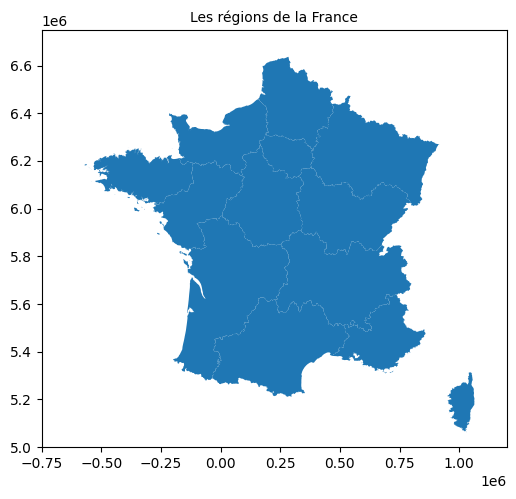

In [6]:
#REPRESENTATION 

if france.crs.to_string() != "EPSG:3857":
    france = france.to_crs(epsg=3857)
#Les  limites de la carte
xmin, xmax = -0.75e6, 1.2e6  # Convertir les limites en mètres (EPSG:3857)
ymin, ymax = 5e6, 6.75e6

#Ploting
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
plt.title("Les régions de la France", fontsize=10)
plt.show()


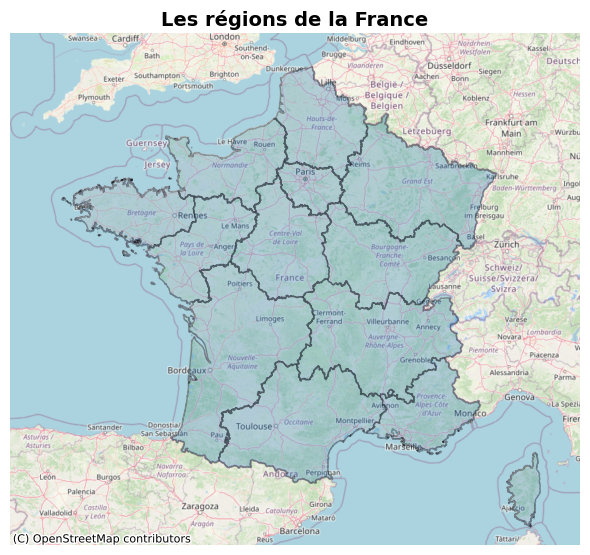

In [7]:
# Ajout d'un fond de carte pour un meilleur contexte géographique
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) 
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# 
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
#
plt.title("Les régions de la France", fontsize=14, fontweight='bold')
ax.axis('off') 

plt.tight_layout() 
plt.show()


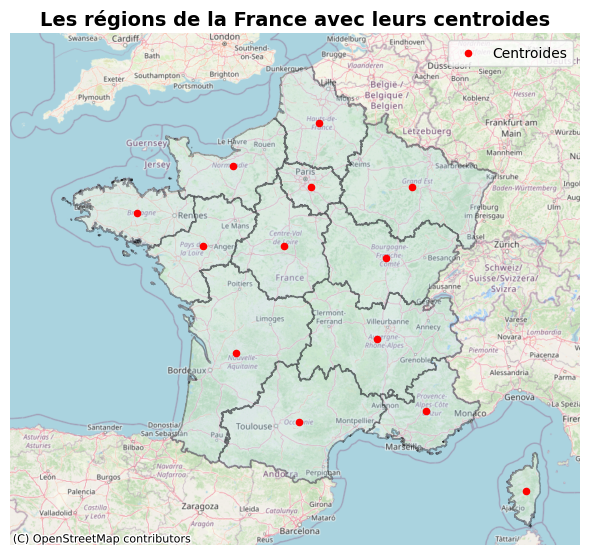

In [8]:
#Représentation des centroides 
france['centroid'] = france.geometry.centroid
france['longitude'] = france.centroid.x
france['latitude'] = france.centroid.y
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
france.plot(ax=ax, edgecolor='black', linewidth=1, alpha=0.3, color='lightblue')
ax.scatter(france['longitude'], france['latitude'], color='red', s=20, label='Centroides')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=france.crs)
plt.title("Les régions de la France avec leurs centroides", fontsize=14, fontweight='bold')
ax.axis('off')
ax.legend()
plt.tight_layout()
plt.show()

In [9]:
# Calcul des longitudes et latitudes 
france = france.to_crs(epsg=4326)
france['longitude'] = france.geometry.centroid.x
france['latitude'] = france.geometry.centroid.y
print(france[['LIBELLE_REGION', 'longitude', 'latitude']])


                LIBELLE_REGION  longitude   latitude
0                   Guadeloupe -61.539833  16.197646
1                       Guyane -53.239940   3.915167
2                   Martinique -61.019379  14.654871
3                      Mayotte  45.147435 -12.820617
4         Auvergne-Rhône-Alpes   4.536119  45.514642
5                    Occitanie   2.143923  43.702500
6                     Bretagne  -2.841463  48.177549
7           Nouvelle-Aquitaine   0.212719  45.206040
8                    Normandie   0.110932  49.120067
9   Provence-Alpes-Côte d'Azur   6.061005  43.958789
10            Pays de la Loire  -0.816786  47.478104
11                   Grand Est   5.613112  48.688977
12     Bourgogne-Franche-Comté   4.806857  47.234282
13               Île-de-France   2.503401  48.709316
14         Centre-Val de Loire   1.684391  47.484775
15             Hauts-de-France   2.771303  49.969594
16                       Corse   9.106152  42.151511
17                  La Réunion  55.532509 -21.

C:\Users\steph\AppData\Local\Temp\ipykernel_20332\2487130668.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['longitude'] = france.geometry.centroid.x
C:\Users\steph\AppData\Local\Temp\ipykernel_20332\2487130668.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  france['latitude'] = france.geometry.centroid.y


In [10]:
france.head()

INSEE_REG    PAYS        LIBELLE_REGION  POPULATION  \
0          1  France            Guadeloupe      384239   
1          3  France                Guyane      281678   
2          2  France            Martinique      364508   
3          6  France               Mayotte      256518   
4         84  France  Auvergne-Rhône-Alpes     8042936   

                             SOURCE  \
0  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
1  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
2  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
3  IGN:EXPRESS-COG-CARTO-TERRITOIRE   
4  IGN:EXPRESS-COG-CARTO-TERRITOIRE   

                                            geometry  \
0  MULTIPOLYGON (((-61.62648 16.27275, -61.62658 ...   
1  MULTIPOLYGON (((-51.6408 4.21282, -51.64144 4....   
2  MULTIPOLYGON (((-60.93246 14.7306, -60.9326 14...   
3  MULTIPOLYGON (((45.08357 -12.96139, 45.08547 -...   
4  POLYGON ((6.06386 46.41639, 6.06267 46.4168, 6...   

                           centroid  longitude   latitude  
0  POINT (-6850582.542 1827642.261) -61.539833  16.197646  
1    POINT (-5926644.81 436331.726) -53.239940   3.915167  
2  POINT (-6792650.367 1649468.223) -61.019379  14.654871  
3  POINT (5025789.843 -1439250.269)  45.147435 -12.820617  
4     POINT (504837.95 5704315.458)   4.536119  45.514642

In [11]:
# Création de la liste de triplets (région, longitude, latitude)
region_centroides = []
for index, row in france.iterrows():
    region = row['LIBELLE_REGION']  # Nom de la région
    longitude = row['longitude']  # Longitude du centroïde
    latitude = row['latitude']    # Latitude du centroïde
    region_centroides.append((region, longitude, latitude)) # Ajout du triplet à la liste
region_centroides

[('Guadeloupe', -61.53983304107784, 16.197645826552904),
 ('Guyane', -53.23993971851178, 3.915166862499844),
 ('Martinique', -61.019378740773654, 14.654870858984358),
 ('Mayotte', 45.14743542382146, -12.820616875536656),
 ('Auvergne-Rhône-Alpes', 4.536118586333609, 45.51464202656834),
 ('Occitanie', 2.143922833937654, 43.70250024549978),
 ('Bretagne', -2.841462676465886, 48.17754922086023),
 ('Nouvelle-Aquitaine', 0.21271860548694332, 45.2060395396088),
 ('Normandie', 0.11093239896467046, 49.12006667987373),
 ("Provence-Alpes-Côte d'Azur", 6.061004522552231, 43.95878857291765),
 ('Pays de la Loire', -0.81678598261894, 47.47810354487287),
 ('Grand Est', 5.613112231600144, 48.68897740160863),
 ('Bourgogne-Franche-Comté', 4.806856915301157, 47.2342819451994),
 ('Île-de-France', 2.503401392552759, 48.70931550109074),
 ('Centre-Val de Loire', 1.684391322381998, 47.48477508284454),
 ('Hauts-de-France', 2.7713028658475474, 49.969593961262426),
 ('Corse', 9.106151755156151, 42.15151137562012),

## Collecte des Données de Qualité de l'Air

Ce script collecte des **données horaires de qualité de l'air** via l'API Open-Meteo pour différentes régions. 
Il récupère les polluants clés (**PM10**, **PM2.5**, **CO**, **NO₂**, **SO₂**, **Ozone**)  et quelques données sur le climat
et les organise dans un tableau structuré.

---

## **Fonctionnalités**
- Utilisation d'un **cache** et de **répétitions automatiques** pour des requêtes fiables.
- Organisation des données dans des **DataFrames pandas**.
- Ajout d'une colonne pour **extraire les dates** sans les heures.
- Fusion des données pour une **analyse centralisée**.





### Récupération des données sur les polluants 

In [12]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
from openmeteo_requests import Client


# Création d'une session avec cache
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = Client(session=retry_session)

# Création d'un dictionnaire pour stocker les DataFrames
region_dataframes = {}

# Boucle pour récupérer les données pour chaque région
for region, longitude, latitude in region_centroides:
    try:
        url = "https://air-quality-api.open-meteo.com/v1/air-quality"
        params = {
            "latitude": latitude,
            "longitude": longitude,
            "current": ["european_aqi", "us_aqi"],
            "hourly": ["pm10", "pm2_5", "carbon_monoxide", "carbon_dioxide", "nitrogen_dioxide", "sulphur_dioxide", "ozone"],
            "start_date": "2023-01-01",
            "end_date": "2024-11-30"
        }

        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]  # Première réponse, si plusieurs localisations

        # Récupération des données horaires
        hourly = response.Hourly()
        hourly_data = {
            "date": pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            ),
            "region": [region] * len(pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            )),
            "pm10": hourly.Variables(0).ValuesAsNumpy(),
            "pm2_5": hourly.Variables(1).ValuesAsNumpy(),
            "carbon_monoxide": hourly.Variables(2).ValuesAsNumpy(),
            "carbon_dioxide": hourly.Variables(3).ValuesAsNumpy(),
            "nitrogen_dioxide": hourly.Variables(4).ValuesAsNumpy(),
            "sulphur_dioxide": hourly.Variables(5).ValuesAsNumpy(),
            "ozone": hourly.Variables(6).ValuesAsNumpy()
        }

        # Stockage du DataFrame dans le dictionnaire
        region_dataframes[region] = pd.DataFrame(data=hourly_data)

    except Exception as e:
        print(f"Erreur lors de la récupération des données pour {region}: {e}")

# Concaténation tous les DataFrames
combined_dataframe_air = pd.concat(region_dataframes.values(), ignore_index=True)
combined_dataframe_air['date'] = pd.to_datetime(combined_dataframe_air['date'])
# Création d'une nouvelle colonne 'day' contenant uniquement la date (sans l'heure)
#combined_dataframe_air['day'] = combined_dataframe_air['date'].dt.date
combined_dataframe_air.insert(1,"day",combined_dataframe_air["date"].dt.date)



In [13]:
combined_dataframe_air

date         day      region       pm10  pm2_5  \
0      2023-01-01 00:00:00+00:00  2023-01-01  Guadeloupe  20.500000   11.3   
1      2023-01-01 01:00:00+00:00  2023-01-01  Guadeloupe  21.700001   11.9   
2      2023-01-01 02:00:00+00:00  2023-01-01  Guadeloupe  21.799999   12.0   
3      2023-01-01 03:00:00+00:00  2023-01-01  Guadeloupe  20.700001   11.4   
4      2023-01-01 04:00:00+00:00  2023-01-01  Guadeloupe  19.400000   10.7   
...                          ...         ...         ...        ...    ...   
302395 2024-11-30 19:00:00+00:00  2024-11-30  La Réunion  10.000000    7.1   
302396 2024-11-30 20:00:00+00:00  2024-11-30  La Réunion   9.800000    7.1   
302397 2024-11-30 21:00:00+00:00  2024-11-30  La Réunion   9.700000    7.0   
302398 2024-11-30 22:00:00+00:00  2024-11-30  La Réunion   9.500000    6.9   
302399 2024-11-30 23:00:00+00:00  2024-11-30  La Réunion   9.500000    7.0   

        carbon_monoxide  carbon_dioxide  nitrogen_dioxide  sulphur_dioxide  \
0                  89.0             NaN              3.70             0.30   
1                  89.0             NaN              3.45             0.30   
2                  88.0             NaN              3.15             0.25   
3                  88.0             NaN              2.60             0.25   
4                  88.0             NaN              2.10             0.25   
...                 ...             ...               ...              ...   
302395            100.0           459.0              3.60             2.50   
302396             95.0           455.0              4.20             2.30   
302397             91.0           453.0              4.50             2.20   
302398             90.0           455.0              4.40             2.10   
302399             89.0           459.0              4.10             2.10   

        ozone  
0        62.0  
1        62.0  
2        63.0  
3        64.0  
4        64.0  
...       ...  
302395   56.0  
302396   52.0  
302397   49.0  
302398   47.0  
302399   46.0  

[302400 rows x 10 columns]

### Récupération des données sur le climat comme la température, etc.

In [14]:
# Création d'une session avec cache
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = Client(session=retry_session)

# Création d'un dictionnaire pour stocker les DataFrames
region_dataframes = {}

# Boucle pour récupérer les données pour chaque région
for region, longitude, latitude in region_centroides:
    try:
        url = "https://archive-api.open-meteo.com/v1/archive"
        params = {
            "latitude": latitude,
            "longitude": longitude,
            "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "surface_pressure", "wind_speed_10m", "soil_temperature_0_to_7cm", "soil_moisture_0_to_7cm"],
            "start_date": "2023-01-01",
            "end_date": "2024-11-30"
        }

        responses = openmeteo.weather_api(url, params=params)
        response = responses[0]  # Première réponse, si plusieurs localisations

        # Récupération des données horaires
        hourly = response.Hourly()
        hourly_data = {
            "date": pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            ),
            "region": [region] * len(pd.date_range(
                start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                freq=pd.Timedelta(seconds=hourly.Interval()),
                inclusive="left"
            )),
            "temperature_2m": hourly.Variables(0).ValuesAsNumpy(),
            "relative_humidity_2m": hourly.Variables(1).ValuesAsNumpy(),
            "precipitation": hourly.Variables(2).ValuesAsNumpy(),
            "surface_pressure": hourly.Variables(3).ValuesAsNumpy(),
            "wind_speed_10m": hourly.Variables(4).ValuesAsNumpy(),
            "soil_temperature_0_to_7cm": hourly.Variables(5).ValuesAsNumpy(),
            "soil_moisture_0_to_7cm": hourly.Variables(6).ValuesAsNumpy(),
            
        }

        # Stockage du DataFrame dans le dictionnaire
        region_dataframes[region] = pd.DataFrame(data=hourly_data)

    except Exception as e:
        print(f"Erreur lors de la récupération des données pour {region}: {e}")
        
    # Concaténation tous les DataFrames
combined_dataframe_climat = pd.concat(region_dataframes.values(), ignore_index=True)
combined_dataframe_climat = combined_dataframe_climat.drop(columns=["region","date"])

### Concaténation des deux Dataframes

In [15]:
df=pd.concat([combined_dataframe_air,combined_dataframe_climat],axis=1)
df

date         day      region       pm10  pm2_5  \
0      2023-01-01 00:00:00+00:00  2023-01-01  Guadeloupe  20.500000   11.3   
1      2023-01-01 01:00:00+00:00  2023-01-01  Guadeloupe  21.700001   11.9   
2      2023-01-01 02:00:00+00:00  2023-01-01  Guadeloupe  21.799999   12.0   
3      2023-01-01 03:00:00+00:00  2023-01-01  Guadeloupe  20.700001   11.4   
4      2023-01-01 04:00:00+00:00  2023-01-01  Guadeloupe  19.400000   10.7   
...                          ...         ...         ...        ...    ...   
302395 2024-11-30 19:00:00+00:00  2024-11-30  La Réunion  10.000000    7.1   
302396 2024-11-30 20:00:00+00:00  2024-11-30  La Réunion   9.800000    7.1   
302397 2024-11-30 21:00:00+00:00  2024-11-30  La Réunion   9.700000    7.0   
302398 2024-11-30 22:00:00+00:00  2024-11-30  La Réunion   9.500000    6.9   
302399 2024-11-30 23:00:00+00:00  2024-11-30  La Réunion   9.500000    7.0   

        carbon_monoxide  carbon_dioxide  nitrogen_dioxide  sulphur_dioxide  \
0                  89.0             NaN              3.70             0.30   
1                  89.0             NaN              3.45             0.30   
2                  88.0             NaN              3.15             0.25   
3                  88.0             NaN              2.60             0.25   
4                  88.0             NaN              2.10             0.25   
...                 ...             ...               ...              ...   
302395            100.0           459.0              3.60             2.50   
302396             95.0           455.0              4.20             2.30   
302397             91.0           453.0              4.50             2.20   
302398             90.0           455.0              4.40             2.10   
302399             89.0           459.0              4.10             2.10   

        ozone  temperature_2m  relative_humidity_2m  precipitation  \
0        62.0       23.770000             84.863304            0.0   
1        62.0       23.719999             85.643173            0.0   
2        63.0       23.520000             86.947586            0.0   
3        64.0       23.270000             88.269188            0.0   
4        64.0       22.469999             94.082932            0.2   
...       ...             ...                   ...            ...   
302395   56.0       10.291500             93.833534            0.0   
302396   52.0        9.891500             93.814590            0.0   
302397   49.0        9.391500             97.342743            0.0   
302398   47.0        8.891500             99.663048            0.0   
302399   46.0        9.091500             99.663582            0.0   

        surface_pressure  wind_speed_10m  soil_temperature_0_to_7cm  \
0            1017.400024        9.422101                  24.020000   
1            1017.599976        9.885262                  23.670000   
2            1017.700012        9.720000                  23.420000   
3            1017.400024        7.559999                  23.219999   
4            1017.299988        8.825508                  23.020000   
...                  ...             ...                        ...   
302395        824.523071        3.617955                  12.941500   
302396        823.957458        3.847960                  12.441500   
302397        823.007019        3.065289                  11.991500   
302398        822.137085        2.979530                  11.591500   
302399        821.774109        3.710795                  11.341500   

        soil_moisture_0_to_7cm  
0                        0.501  
1                        0.499  
2                        0.498  
3                        0.497  
4                        0.497  
...                        ...  
302395                   0.235  
302396                   0.235  
302397                   0.234  
302398                   0.234  
302399                   0.234  

[302400 rows x 17 columns]

## 🌍 Calcul de l'Indice ATMO

L'**indice ATMO** est utilisé en France pour évaluer la qualité de l'air en se basant sur cinq principaux polluants : **PM10**, **PM2.5**, **NO₂**, **O₃**, et **SO₂**. 

Il synthétise ces données en un indicateur unique, simple à interpréter.

---

### 🛠️ **Méthode de Calcul**

#### **1. Calcul des Sous-Indices**
Chaque polluant se voit attribuer un **sous-indice** en fonction de sa concentration moyenne journalière 

(ou glissante pour certains polluants). Les seuils sont définis comme suit :

| **Sous-indice** | **PM10 (µg/m³)** | **PM2.5 (µg/m³)** | **NO₂ (µg/m³)** | **O₃ (µg/m³)** | **SO₂ (µg/m³)** |
|-----------------|------------------|-------------------|-----------------|----------------|-----------------|
| 1 (Très bon)   | 0 - 6            | 0 - 5             | 0 - 29          | 0 - 29         | 0 - 39          |
| 2              | 7 - 13           | 6 - 10            | 30 - 54         | 30 - 54        | 40 - 79         |
| 3              | 14 - 20          | 11 - 15           | 55 - 84         | 55 - 79        | 80 - 119        |
| 4              | 21 - 27          | 16 - 20           | 85 - 109        | 80 - 104       | 120 - 159       |
| 5              | 28 - 34          | 21 - 25           | 110 - 134       | 105 - 129      | 160 - 199       |
| 6              | 35 - 41          | 26 - 30           | 135 - 164       | 130 - 149      | 200 - 249       |
| 7              | 42 - 49          | 31 - 40           | 165 - 199       | 150 - 179      | 250 - 299       |
| 8              | 50 - 64          | 41 - 50           | 200 - 274       | 180 - 209      | 300 - 399       |
| 9              | 65 - 79          | 51 - 75           | 275 - 399       | 210 - 239      | 400 - 499       |
| 10 (Très mauvais) | ≥ 80          | ≥ 76              | ≥ 400           | ≥ 240          | ≥ 500           |

#### **2. Détermination de l'Indice Final**
L'**indice ATMO** correspond au **sous-indice le plus élevé** parmi les cinq polluants mesurés sur une journée. 

Cela signifie que le polluant le plus préoccupant domine l'indicateur global.

---

### 📊 **Échelle de Qualité de l'Air**

| **Indice ATMO** | **Niveau de Qualité** | **Couleur Associée** |
|------------------|-----------------------|-----------------------|
| 1-2             | Très bon              | 🟢 Vert clair         |
| 3-4             | Bon                   | 🟢 Vert               |
| 5               | Moyen                 | 🟡 Jaune              |
| 6-7             | Médiocre              | 🟠 Orange             |
| 8-9             | Mauvais               | 🔴 Rouge              |
| 10              | Très mauvais          | 🟣 Violet             |

---

### 🔗 **Référence Officielle**
Pour plus de détails, consultez la page officielle de l'indice ATMO sur [Atmo France](https://www.atmo-france.org/article/lindice-atmo).

---


In [16]:
import pandas as pd

# Convert 'date' and 'day' columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['day'] = pd.to_datetime(df['day'])

# Sort data by 'region', 'day', and 'date'
df = df.sort_values(by=['region', 'day', 'date'])

# Define functions to compute sub-indices for each pollutant
def get_subindex_pm10(value):
    if value <= 6: return 1
    elif value <= 13: return 2
    elif value <= 20: return 3
    elif value <= 27: return 4
    elif value <= 34: return 5
    elif value <= 41: return 6
    elif value <= 49: return 7
    elif value <= 64: return 8
    elif value <= 79: return 9
    else: return 10

def get_subindex_pm2_5(value):
    if value <= 5: return 1
    elif value <= 10: return 2
    elif value <= 15: return 3
    elif value <= 20: return 4
    elif value <= 25: return 5
    elif value <= 30: return 6
    elif value <= 40: return 7
    elif value <= 50: return 8
    elif value <= 75: return 9
    else: return 10

def get_subindex_no2(value):
    if value <= 29: return 1
    elif value <= 54: return 2
    elif value <= 84: return 3
    elif value <= 109: return 4
    elif value <= 134: return 5
    elif value <= 164: return 6
    elif value <= 199: return 7
    elif value <= 274: return 8
    elif value <= 399: return 9
    else: return 10

def get_subindex_o3(value):
    if value <= 29: return 1
    elif value <= 54: return 2
    elif value <= 79: return 3
    elif value <= 104: return 4
    elif value <= 129: return 5
    elif value <= 149: return 6
    elif value <= 179: return 7
    elif value <= 209: return 8
    elif value <= 239: return 9
    else: return 10

def get_subindex_so2(value):
    if value <= 39: return 1
    elif value <= 79: return 2
    elif value <= 119: return 3
    elif value <= 159: return 4
    elif value <= 199: return 5
    elif value <= 249: return 6
    elif value <= 299: return 7
    elif value <= 399: return 8
    elif value <= 499: return 9
    else: return 10

# Calcul des moyennes journalières pour toutes les variables
daily_data = df.groupby(['day', 'region']).agg({
    'pm10': 'mean',
    'pm2_5': 'mean',
    'nitrogen_dioxide': 'mean',
    'ozone': lambda x: x.rolling(8, min_periods=1).mean().max(),  # Max sur 8h glissantes
    'sulphur_dioxide': 'mean',
    **{col: 'mean' for col in df.columns if col not in ['date', 'day', 'region', 'pm10', 'pm2_5', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide']}
}).reset_index()

# Calcul des sous-indices
daily_data['subindex_pm10'] = daily_data['pm10'].apply(get_subindex_pm10)
daily_data['subindex_pm2_5'] = daily_data['pm2_5'].apply(get_subindex_pm2_5)
daily_data['subindex_no2'] = daily_data['nitrogen_dioxide'].apply(get_subindex_no2)
daily_data['subindex_o3'] = daily_data['ozone'].apply(get_subindex_o3)
daily_data['subindex_so2'] = daily_data['sulphur_dioxide'].apply(get_subindex_so2)

# Calcul de l'indice Atmo final
daily_data['indice_atmo'] = daily_data[[
    'subindex_pm10', 'subindex_pm2_5', 'subindex_no2', 'subindex_o3', 'subindex_so2'
]].max(axis=1)

# Fusion avec le DataFrame original pour conserver uniquement les colonnes de df
final_df = df[['day', 'region']].drop_duplicates().merge(daily_data, on=['day', 'region'], how='left')

# Affichage du résultat final
final_df


day                region       pm10      pm2_5  \
0     2023-01-01  Auvergne-Rhône-Alpes  14.954166   7.858334   
1     2023-01-02  Auvergne-Rhône-Alpes  14.316667   7.962500   
2     2023-01-03  Auvergne-Rhône-Alpes   8.666667   6.525000   
3     2023-01-04  Auvergne-Rhône-Alpes  15.504167  11.441667   
4     2023-01-05  Auvergne-Rhône-Alpes  11.616666   9.070833   
...          ...                   ...        ...        ...   
12595 2024-11-26         Île-de-France  12.691667   8.512500   
12596 2024-11-27         Île-de-France   7.362500   5.725000   
12597 2024-11-28         Île-de-France  14.870833  12.295834   
12598 2024-11-29         Île-de-France  14.041667  11.537499   
12599 2024-11-30         Île-de-France  20.308332  17.858334   

       nitrogen_dioxide   ozone  sulphur_dioxide  carbon_monoxide  \
0              3.475000  65.125         0.837500       118.791664   
1              5.904167  71.000         0.933333       136.208328   
2             11.420834  53.750         0.729167       170.833328   
3             17.929167  37.875         1.075000       194.125000   
4             12.416667  44.375         0.725000       170.000000   
...                 ...     ...              ...              ...   
12595         13.220833  57.375         0.916667       193.083328   
12596         11.762500  62.750         0.775000       171.625000   
12597         19.445833  45.000         1.537500       227.041672   
12598         12.087501  53.250         0.920833       207.750000   
12599         17.637501  37.000         1.420833       278.291656   

       carbon_dioxide  temperature_2m  ...  surface_pressure  wind_speed_10m  \
0                 NaN       11.954083  ...        964.791809       23.574928   
1                 NaN       10.583250  ...        965.794250       15.330505   
2                 NaN        6.727000  ...        971.449707        5.034335   
3                 NaN        5.220750  ...        972.121399        4.557892   
4                 NaN        7.531167  ...        968.975586        5.073804   
...               ...             ...  ...               ...             ...   
12595      449.125000        8.658334  ...       1014.152649       11.292778   
12596      446.583344       10.439584  ...       1012.352295       17.599253   
12597      459.791656        6.358334  ...       1022.028015        6.830119   
12598      450.000000        3.558333  ...       1023.345276        9.613878   
12599      463.250000        2.770833  ...       1021.944885        4.865319   

       soil_temperature_0_to_7cm  soil_moisture_0_to_7cm  subindex_pm10  \
0                      10.964500                0.365333              3   
1                      10.477000                0.384500              3   
2                       7.685333                0.411792              2   
3                       5.731167                0.387917              3   
4                       7.256167                0.384125              2   
...                          ...                     ...            ...   
12595                   8.785417                0.402167              2   
12596                   9.512501                0.395292              2   
12597                   7.887500                0.391583              3   
12598                   4.350000                0.386667              3   
12599                   3.306250                0.376583              4   

       subindex_pm2_5  subindex_no2  subindex_o3  subindex_so2  indice_atmo  
0                   2             1            3             1            3  
1                   2             1            3             1            3  
2                   2             1            2             1            2  
3                   3             1            2             1            3  
4                   2             1            2             1            2  
...               ...           ...          ...           ...          ...  
12595  

# 📊 ANALYSE EXPLORATOIRE

Cette analyse explore les données en **panel** afin de comprendre les tendances, les relations entre variables et les spécificités régionales et temporelles. 

Elle sert également de base à la préparation des données pour la modélisation prédictive.

---

## **1. Exploration de base des données**

### 🔍 **Statistiques descriptives globales**



### 🌍 Filtrage des Données : Régions Européennes

Dans cette étape, nous avons filtré les données pour ne conserver que les régions françaises situées en Europe. Ce filtrage est essentiel pour se concentrer sur les régions métropolitaines et éviter de mélanger les données avec celles des régions d'outre-mer.

---

#### **1. Liste des Régions Européennes**
Voici les 13 régions métropolitaines françaises incluses dans l'analyse :

1. Auvergne-Rhône-Alpes  
2. Bourgogne-Franche-Comté  
3. Bretagne  
4. Centre-Val de Loire  
5. Corse  
6. Grand Est  
7. Hauts-de-France  
8. Île-de-France  
9. Normandie  
10. Nouvelle-Aquitaine  
11. Occitanie  
12. Pays de la Loire  
13. Provence-Alpes-Côte d'Azur  

In [28]:
regions_europe = ["Auvergne-Rhône-Alpes","Bourgogne-Franche-Comté","Bretagne","Centre-Val de Loire","Corse","Grand Est","Hauts-de-France","Île-de-France","Normandie","Nouvelle-Aquitaine","Occitanie","Pays de la Loire",
    "Provence-Alpes-Côte d'Azur"
]

# Filtrage des régions européennes
data = final_df[final_df['region'].isin(regions_europe)]


In [18]:
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

'pip' n'est pas reconnu en tant que commande interne
ou externe, un programme ex�cutable ou un fichier de commandes.


In [19]:
data.shape

(9100, 22)

####  🔍 Vérification de la structure des données panel

Nous allons vérifier si chaque combinaison region et day est unique


In [20]:
print(data.groupby(['region', 'day']).size())
duplicates = data.groupby(['region', 'day']).size()
print((duplicates > 1).sum())  # Vérifie combien de combinaisons ont plus d'une observation



region                day       
Auvergne-Rhône-Alpes  2023-01-01    1
                      2023-01-02    1
                      2023-01-03    1
                      2023-01-04    1
                      2023-01-05    1
                                   ..
Île-de-France         2024-11-26    1
                      2024-11-27    1
                      2024-11-28    1
                      2024-11-29    1
                      2024-11-30    1
Length: 9100, dtype: int64
0


### 🔍 Valeurs manquantes

In [21]:
data.isnull().sum() / len(data) * 100


day                           0.000000
region                        0.000000
pm10                          0.000000
pm2_5                         0.000000
nitrogen_dioxide              0.000000
ozone                         0.000000
sulphur_dioxide               0.000000
carbon_monoxide               0.000000
carbon_dioxide               94.857143
temperature_2m                0.000000
relative_humidity_2m          0.000000
precipitation                 0.000000
surface_pressure              0.000000
wind_speed_10m                0.000000
soil_temperature_0_to_7cm     0.000000
soil_moisture_0_to_7cm        0.000000
subindex_pm10                 0.000000
subindex_pm2_5                0.000000
subindex_no2                  0.000000
subindex_o3                   0.000000
subindex_so2                  0.000000
indice_atmo                   0.000000
dtype: float64

### **2. Observations Clés**
1. **Absence de valeurs manquantes** :  
   - La majorité des variables ne contiennent **aucune valeur manquante**, ce qui garantit une bonne qualité des données pour ces dimensions.

2. **Problème majeur avec `carbon_dioxide`** :  
   - Cette variable présente **94.86% de valeurs manquantes**, ce qui rend son utilisation directe problématique.
   - Nous allons donc supprimer cette colonne 


In [22]:
data = data.drop(columns=['carbon_dioxide'])
data.head()

day                region       pm10      pm2_5  nitrogen_dioxide  \
0 2023-01-01  Auvergne-Rhône-Alpes  14.954166   7.858334          3.475000   
1 2023-01-02  Auvergne-Rhône-Alpes  14.316667   7.962500          5.904167   
2 2023-01-03  Auvergne-Rhône-Alpes   8.666667   6.525000         11.420834   
3 2023-01-04  Auvergne-Rhône-Alpes  15.504167  11.441667         17.929167   
4 2023-01-05  Auvergne-Rhône-Alpes  11.616666   9.070833         12.416667   

    ozone  sulphur_dioxide  carbon_monoxide  temperature_2m  \
0  65.125         0.837500       118.791664       11.954083   
1  71.000         0.933333       136.208328       10.583250   
2  53.750         0.729167       170.833328        6.727000   
3  37.875         1.075000       194.125000        5.220750   
4  44.375         0.725000       170.000000        7.531167   

   relative_humidity_2m  ...  surface_pressure  wind_speed_10m  \
0             71.024551  ...        964.791809       23.574928   
1             76.024849  ...        965.794250       15.330505   
2             87.053253  ...        971.449707        5.034335   
3             84.029167  ...        972.121399        4.557892   
4             89.476860  ...        968.975586        5.073804   

   soil_temperature_0_to_7cm  soil_moisture_0_to_7cm  subindex_pm10  \
0                  10.964500                0.365333              3   
1                  10.477000                0.384500              3   
2                   7.685333                0.411792              2   
3                   5.731167                0.387917              3   
4                   7.256167                0.384125              2   

   subindex_pm2_5  subindex_no2  subindex_o3  subindex_so2  indice_atmo  
0               2             1            3             1            3  
1               2             1            3             1            3  
2               2             1            2             1            2  
3               3             1            2             1            3  
4               2             1            2             1            2  

[5 rows x 21 columns]

In [23]:
# Statistiques de base pour toutes les variables:
print(data.describe())

                       day         pm10        pm2_5  nitrogen_dioxide  \
count                 9100  9100.000000  9100.000000       9100.000000   
mean   2023-12-16 12:00:00    10.907528     7.113768          4.518834   
min    2023-01-01 00:00:00     1.141667     0.850000          0.508333   
25%    2023-06-24 18:00:00     6.933333     4.200000          2.070833   
50%    2023-12-16 12:00:00     9.341666     5.795834          3.135417   
75%    2024-06-08 06:00:00    13.070834     8.529166          5.433333   
max    2024-11-30 00:00:00    83.650002    42.333332         52.420834   
std                    NaN     6.222834     4.548127          4.211990   

             ozone  sulphur_dioxide  carbon_monoxide  temperature_2m  \
count  9100.000000      9100.000000      9100.000000     9100.000000   
mean     74.675422         0.442049       154.634003       12.377439   
min      17.125000         0.000000        87.916664       -7.760250   
25%      64.250000         0.166667       132

### 📊 Statistiques Descriptives des Régions Européennes

Les statistiques ci-dessous présentent un résumé des variables clés collectées pour les 13 régions métropolitaines françaises sur la période donnée.

---

#### **1. Pollution Atmosphérique**

| **Variable**            | **Count** | **Mean** | **Std**  | **Min**   | **25%**   | **50%**   | **75%**   | **Max**   |
|--------------------------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| **PM10** (µg/m³)         | 9,100     | 10.91    | 6.22     | 1.14      | 6.93      | 9.34      | 13.07     | 83.65     |
| **PM2.5** (µg/m³)        | 9,100     | 7.11     | 4.55     | 0.85      | 4.20      | 5.80      | 8.53      | 42.33     |
| **Dioxyde d'Azote** (µg/m³) | 9,100  | 4.52     | 4.21     | 0.51      | 2.07      | 3.14      | 5.43      | 52.42     |
| **Ozone** (µg/m³)        | 9,100     | 74.68    | 17.03    | 17.13     | 64.25     | 73.88     | 84.78     | 161.50    |
| **Dioxyde de Soufre** (µg/m³) | 9,100 | 0.44     | 0.45     | 0.00      | 0.17      | 0.31      | 0.56      | 6.41      |
| **Monoxyde de Carbone** (µg/m³) | 9,100 | 154.63 | 31.88    | 87.92     | 132.86    | 150.21    | 169.46    | 428.00    |
---

#### **2. Variables Météorologiques**

| **Variable**                | **Count** | **Mean** | **Std**  | **Min**   | **25%**   | **50%**   | **75%**   | **Max**   |
|-----------------------------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| **Température à 2m** (°C)   | 9,100     | 12.38    | 6.49     | -7.76     | 7.81      | 12.21     | 17.39     | 30.98     |
| **Humidité Relative** (%)   | 9,100     | 76.97    | 11.36    | 20.43     | 70.55     | 78.62     | 85.42     | 99.78     |
| **Pression au Sol** (hPa)   | 9,100     | 977.22   | 48.22    | 806.49    | 961.56    | 994.55    | 1006.65   | 1038.32   |
| **Vent à 10m** (m/s)        | 9,100     | 11.77    | 5.84     | 1.49      | 7.30      | 10.59     | 15.16     | 41.02     |

---

#### **3. Variables du Sol**

| **Variable**                       | **Count** | **Mean** | **Std**  | **Min**   | **25%**   | **50%**   | **75%**   | **Max**   |
|------------------------------------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| **Température du Sol (0-7cm)** (°C)| 9,100     | 12.68    | 6.60     | -3.18     | 7.90      | 12.43     | 17.87     | 31.14     |
| **Humidité du Sol (0-7cm)** (m³/m³)| 9,100     | 0.33     | 0.08     | 0.06      | 0.28      | 0.35      | 0.39      | 0.51      |

---

#### **4. Sous-Indices et Indice ATMO**

| **Variable**            | **Count** | **Mean** | **Std**  | **Min**   | **25%**   | **50%**   | **75%**   | **Max**   |
|--------------------------|-----------|----------|----------|-----------|-----------|-----------|-----------|-----------|
| **Sous-indice PM10**     | 9,100     | 2.21     | 0.93     | 1.00      | 2.00      | 2.00      | 3.00      | 10.00     |
| **Sous-indice PM2.5**    | 9,100     | 1.89     | 0.98     | 1.00      | 1.00      | 2.00      | 2.00      | 8.00      |
| **Sous-indice NO2**      | 9,100     | 1.00     | 0.06     | 1.00      | 1.00      | 1.00      | 1.00      | 2.00      |
| **Sous-indice O3**       | 9,100     | 3.32     | 0.74     | 1.00      | 3.00      | 3.00      | 4.00      | 7.00      |
| **Sous-indice SO2**      | 9,100     | 1.00     | 0.00     | 1.00      | 1.00      | 1.00      | 1.00      | 1.00      |
| **Indice ATMO**          | 9,100     | 3.50     | 0.79     | 2.00      | 3.00      | 3.00      | 4.00      | 10.00     |

---

#### **Observations Clés**
1. **Polluants :**
   - Les **PM10** et **PM2.5** ont des moyennes modérées mais des maximums élevés, reflétant des pics de pollution dans certaines régions.
   - Les sous-indices pour le **dioxyde de soufre** restent constants à `1`, indiquant des concentrations très faibles dans toutes les régions.

2. **Météorologie :**
   - La **température moyenne** à 2m est d'environ 12.4°C, avec des variations saisonnières marquées.
   - Le vent est modéré en moyenne, mais des rafales atteignant 41 m/s ont été observées.

3. **Indice ATMO :**
   - La majorité des jours ont un indice ATMO de `3` ou `4`, correspondant à une qualité de l'air moyenne ou légèrement médiocre.
   - Quelques jours présentent un indice ATMO élevé (`10`), indiquant une qualité de l'air très mauvaise.



### 📈    Visualisation des Tendances Temporelles des Polluants Atmosphériques

In [24]:
polluants = ['pm10', 'pm2_5','ozone', 'nitrogen_dioxide', 'sulphur_dioxide']
time_trends = data.groupby('day')[polluants].mean()

C:\Users\steph\AppData\Local\Temp\ipykernel_20332\4045991824.py:31: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\steph\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\steph\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


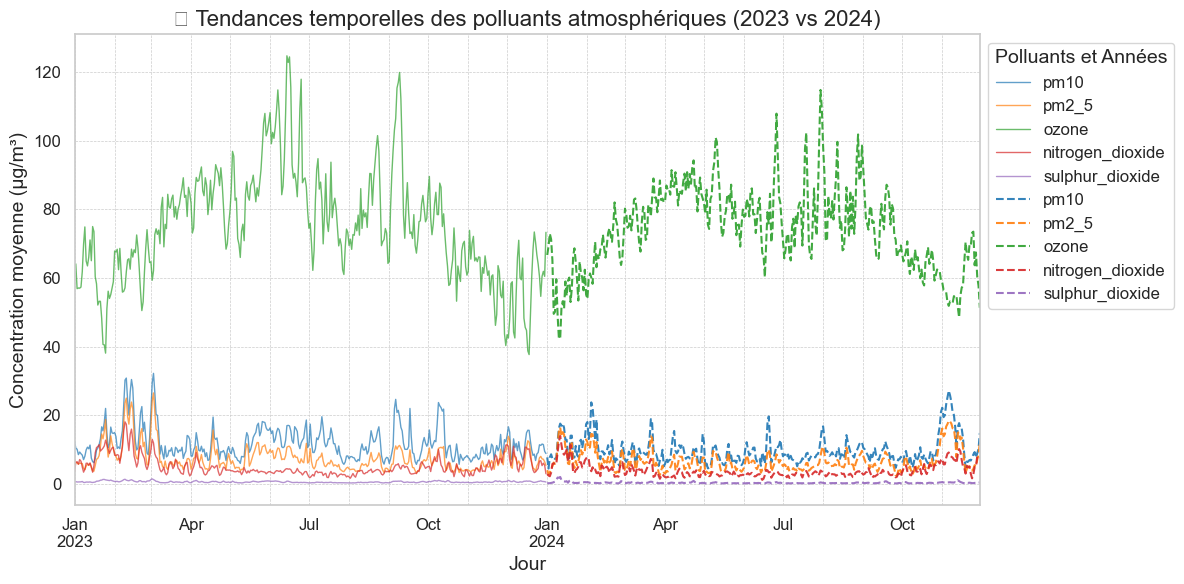

In [29]:
time_trends_2023 = time_trends.loc['2023-01-01':'2023-12-31']
time_trends_2024 = time_trends.loc['2024-01-01':'2024-12-31']
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Traçage des tendances pour 2023
time_trends_2023.plot(
    ax=plt.gca(),
    linewidth=1,
    linestyle="-",  # Ligne pleine pour 2023
    alpha=0.7,
    color=sns.color_palette("tab10", n_colors=len(polluants)),
    label=[f"{pollutant} (2023)" for pollutant in polluants]
)
# Traçage des tendances pour 2024
time_trends_2024.plot(
    ax=plt.gca(),
    linewidth=1.5,
    linestyle="--",  # Ligne pointillée pour 2024
    alpha=0.9,
    color=sns.color_palette("tab10", n_colors=len(polluants)),
    label=[f"{pollutant} (2024)" for pollutant in polluants]
)
plt.title("📈 Tendances temporelles des polluants atmosphériques (2023 vs 2024)", fontsize=16)
plt.xlabel("Jour", fontsize=14)
plt.ylabel("Concentration moyenne (µg/m³)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Polluants et Années", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(visible=True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


1. **Ozone (O₃)** :
   - Les concentrations d'ozone suivent une **forte saisonnalité**, atteignant des pics au printemps et en été. 
   - Ces pics pourraient être dus à une augmentation de la photodissociation des polluants en présence de lumière solaire intense.

2. **PM10 et PM2.5** :
   - Les concentrations de particules (PM10 et PM2.5) sont relativement stables sur l'année, avec quelques **pics sporadiques** qui pourraient être liés à des événements ponctuels, comme des feux de forêt, des émissions industrielles, ou des conditions météorologiques spécifiques (vents secs, inversion thermique).
   - Les niveaux sont légèrement plus élevés en hiver, possiblement en raison des émissions provenant du chauffage résidentiel.

3. **Dioxyde d'azote (NO₂)** :
   - Les niveaux de NO₂ sont faibles mais montrent une légère hausse en hiver. Cela pourrait être attribué à une augmentation des émissions liées au transport et au chauffage.

4. **Dioxyde de soufre (SO₂)** :
   - Les concentrations de SO₂ restent très faibles tout au long de l'année. Les faibles émissions pourraient être liées à des régulations strictes sur les combustibles fossiles contenant du soufre.

##### ✨ Comparaison entre 2023 et 2024
- **Tendances générales similaires** :
  - Les deux années montrent des profils de variation similaires, suggérant une cohérence dans les sources d'émission et les conditions météorologiques.
- **Légères différences dans les niveaux de concentration** :
  - Pour certains polluants comme l'ozone, les niveaux de 2024 semblent légèrement inférieurs à ceux de 2023, ce qui pourrait être dû à des variations climatiques ou des politiques environnementales renforcées.

##### 📌 Points Clés à Retenir
- Les concentrations d'ozone présentent une **forte saisonnalité** et des pics marqués en été.
- Les particules fines (PM10 et PM2.5) montrent des **fluctuations ponctuelles** et des niveaux légèrement plus élevés en hiver.
- Les concentrations de NO₂ et SO₂ restent relativement faibles, avec peu de variations notables.

### 🧐 Vérifions si ces tendances sont égalements observées dans chaque région

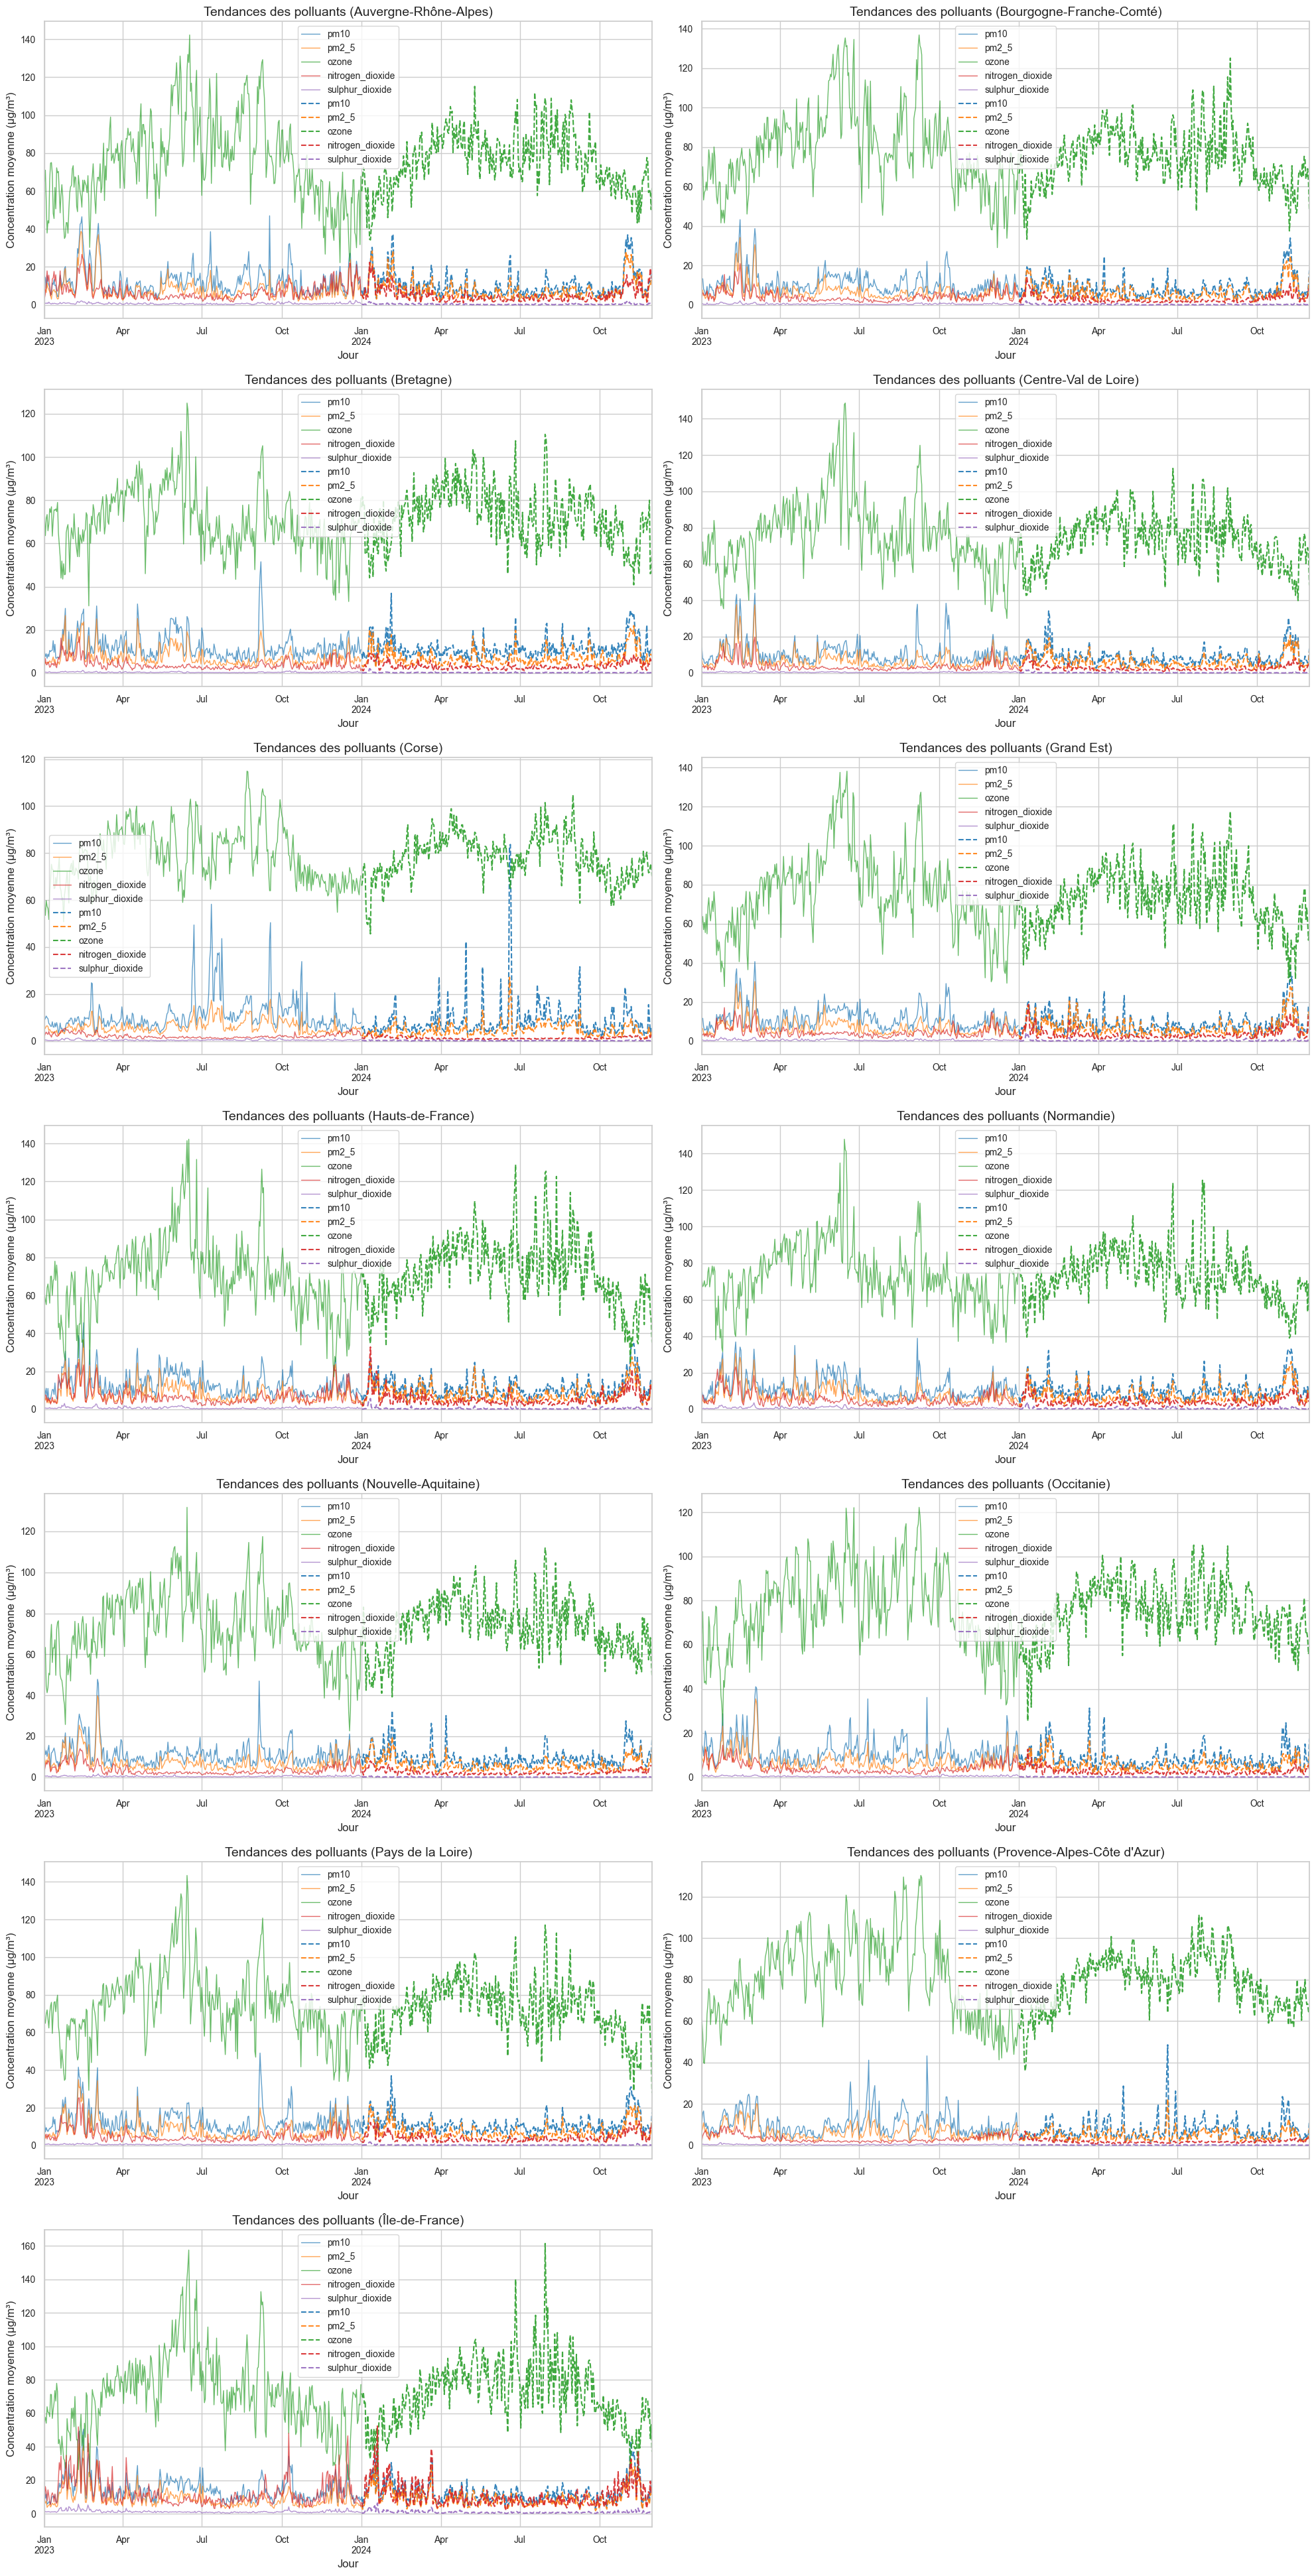

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer le DataFrame groupé
time_trends_reg = data.groupby(['day', 'region'])[polluants].mean()

# Réinitialiser l'index pour faciliter la manipulation
time_trends_reg = time_trends_reg.reset_index()

# Liste unique des régions
regions = time_trends_reg['region'].unique()

sns.set_theme(style="whitegrid")

# Dimensions des sous-graphiques
fig, axes = plt.subplots(
    nrows=(len(regions) + 1) // 2,  # Calculer le nombre de lignes
    ncols=2,
    figsize=(20, len(regions) * 3)
)
axes = axes.flatten()
for i, region in enumerate(regions):
    # Filtrer les données par région
    region_data = time_trends_reg[time_trends_reg['region'] == region]

    # Filtrer les données par année
    time_trends_2023 = region_data[(region_data['day'] >= '2023-01-01') & (region_data['day'] <= '2023-12-31')]
    time_trends_2024 = region_data[(region_data['day'] >= '2024-01-01') & (region_data['day'] <= '2024-12-31')]

    # Traçage des tendances pour 2023
    time_trends_2023.set_index('day')[polluants].plot(
        ax=axes[i],
        linewidth=1,
        linestyle="-",
        alpha=0.7,
        color=sns.color_palette("tab10", n_colors=len(polluants)),
        label=[f"{pollutant} (2023)" for pollutant in polluants]
    )

    # Traçage des tendances pour 2024
    time_trends_2024.set_index('day')[polluants].plot(
        ax=axes[i],
        linewidth=1.5,
        linestyle="--",
        alpha=0.9,
        color=sns.color_palette("tab10", n_colors=len(polluants)),
        label=[f"{pollutant} (2024)" for pollutant in polluants]
    )

    # Ajuster le titre, les axes et la légende
    axes[i].set_title(f"Tendances des polluants ({region})", fontsize=14)
    axes[i].set_xlabel("Jour", fontsize=12)
    axes[i].set_ylabel("Concentration moyenne (µg/m³)", fontsize=12)
    axes[i].tick_params(axis='x', labelsize=10)
    axes[i].tick_params(axis='y', labelsize=10)
    axes[i].legend(fontsize=10)

# Supprimer les axes inutilisés
for j in range(len(regions), len(axes)):
    fig.delaxes(axes[j])

# Ajustement global
plt.tight_layout()
plt.show()


🔰🔰🔰🔰
Les résultats régionaux montrent que les tendances des polluants atmosphériques observées à l’échelle nationale se reflètent globalement dans chaque région, avec des variations notables selon la densité urbaine et les caractéristiques locales. Les régions comme l’Île-de-France et Provence-Alpes-Côte d’Azur affichent des niveaux de pollution plus élevés, notamment en dioxyde d’azote, tandis que des zones comme la Bretagne et la Corse présentent des niveaux globalement plus faibles. Les variations saisonnières, comme les pics d’ozone en été, sont visibles dans toutes les régions, mais leur intensité varie

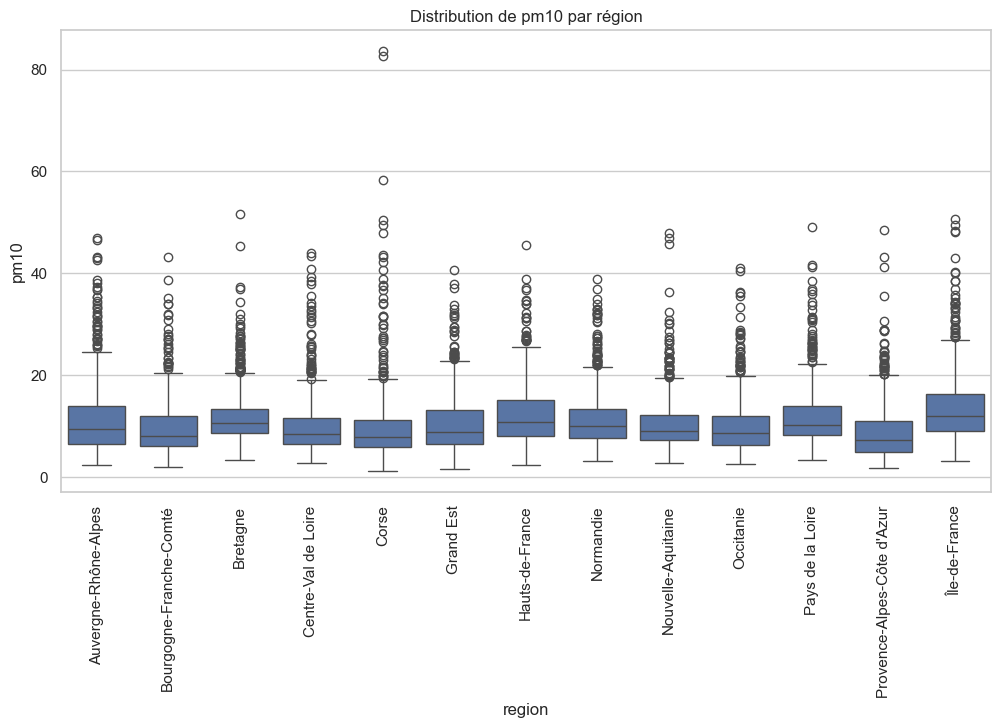

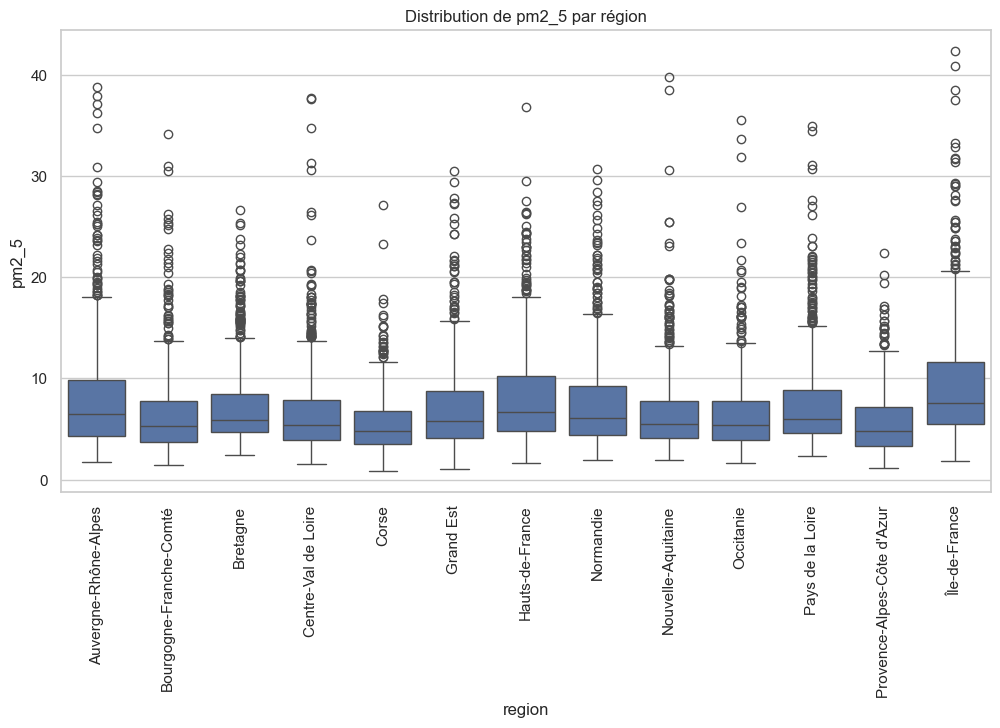

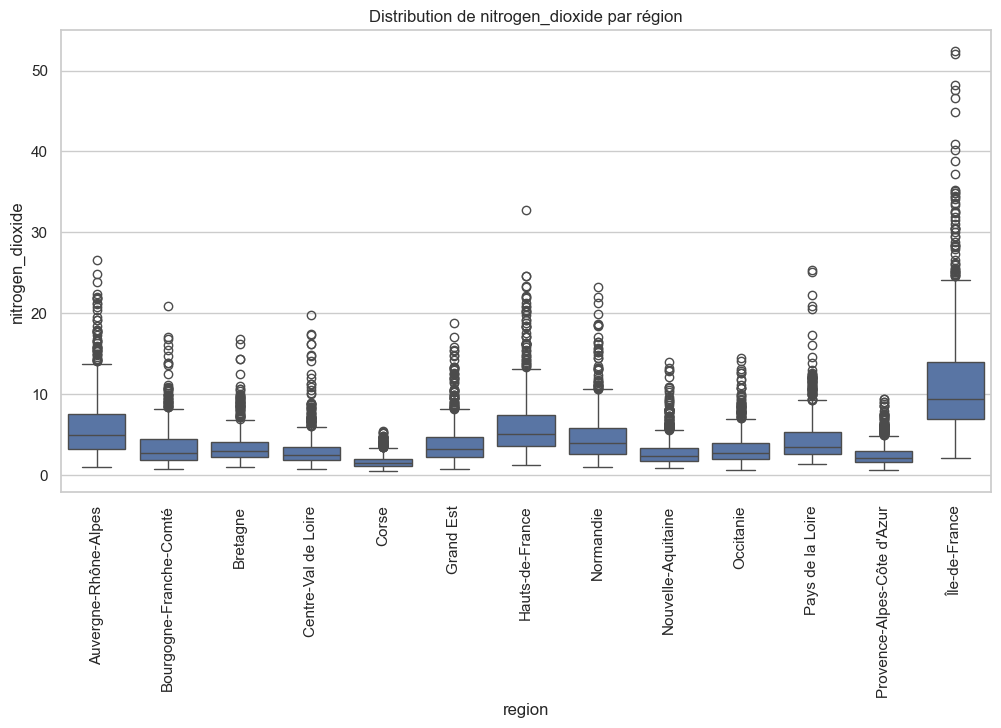

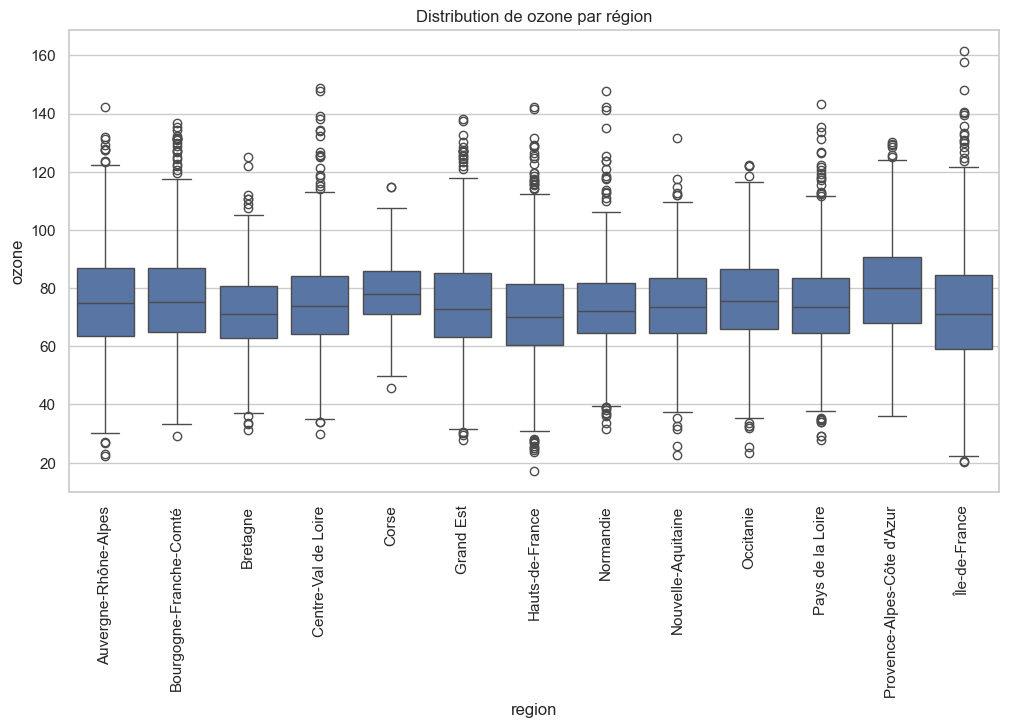

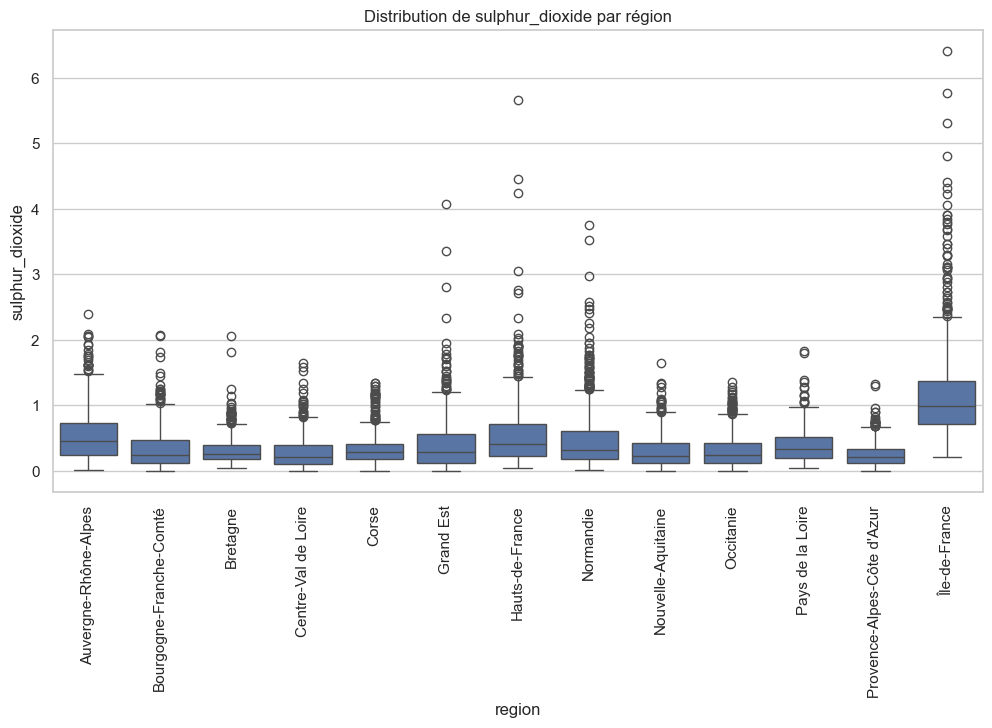

In [27]:
variables = ['pm10', 'pm2_5', 'nitrogen_dioxide', 'ozone', 'sulphur_dioxide']

# Visualisation des distributions des variables pour chaque région
for var in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='region', y=var, data=data)
    plt.title(f'Distribution de {var} par région')
    plt.xticks(rotation=90)
    plt.show()

## Ces statistiques sont menées dans le but de pourvoir détecter les valeurs abérrantes mais une grande question se pose: Est-ce que ces valeurs ne nous aident aident dans l'analyse comme sil s'agit des données de pollution et climatiques?

# Importance des valeurs aberrantes (outliers) dans l’analyse des données de pollution et climatiques

## 1. **Indicateurs d’événements extrêmes**
- Les valeurs aberrantes peuvent refléter des événements exceptionnels tels que :
  - Pollution accrue (incendies, tempêtes de sable, activités industrielles).
  - Conditions climatiques inhabituelles (vagues de chaleur, tempêtes, pluies torrentielles).
- Ces événements ont des impacts significatifs sur la santé, les écosystèmes et les infrastructures.

## 2. **Renseignent sur des problèmes locaux**
- Les outliers peuvent indiquer des problématiques spécifiques :
  - Pics de **PM2.5** ou **PM10** liés à des activités industrielles ou à la circulation routière.
  - Anomalies de température ou de précipitations révélant des changements locaux.

## 3. **Aident à améliorer les modèles prédictifs**
- Ignorer ou mal traiter les outliers peut biaiser les modèles.
- Leur prise en compte permet de construire des modèles robustes capables de gérer des variations inattendues.
- Ils peuvent indiquer des facteurs supplémentaires à intégrer dans les analyses.
## 5. **Révèlent des tendances émergentes**
- Les anomalies peuvent être des indices de tendances émergentes, par exemple :
  - Une augmentation progressive de la pollution liée à des changements d’activités humaines.
  - Des signes de changements climatiques (hausse des températures, variations des cycles de précipitation).

## 6. **Impact sur la santé et la planification**
- Les pics de pollution peuvent avoir des conséquences graves, comme :
  - Des alertes de qualité de l’air pour protéger les populations vulnérables.
  - Une gestion améliorée des ressources face aux conditions météorologiques extrêmes.

## 7. **Prise en compte dans les politiques environnementales**
- Les valeurs aberrantes sont essentielles pour formuler des politiques efficaces :
  - Identification des périodes ou lieux nécessitant des interventions spécifiques.
  - Justification des actions climatiques ou des mesures de réduction de la pollution.
